In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from sympy import *
%matplotlib inline 

In [7]:
a = -3
b = 2
e = 0.0001

A3 = 1
A2 = 2
A1 = 2
A0 = 1

In [8]:
def func(x):
    return x**4 + A3*x**3 + A2*x**2 + A1*x + A0

In [9]:
x= symbols('x')
diff(func(x), x) 

4*x**3 + 3*x**2 + 4*x + 2

In [10]:
def f1(x):
    return 4*x**3 + 3*x**2 + 4*x + 2 

In [11]:
def find_d():
    x= symbols('x')
    return diff(func(x), x)

In [12]:
def find_min(a, b, e):
    fd = find_d()
    fda = fd.evalf(subs={x: a})
    fdb = fd.evalf(subs={x: b})

    d = {}

    if  fda < 0 and fdb > 0:
        while True:
            z = b - (fdb * (b-a)) / (fdb - fda)
            fdz = find_d().evalf(subs={x: z})
            d[z] = fdz

            if abs(fdz) <= e:
                x_min = z
                f_min = func(z)
                break
            else:
                if fdz < 0:
                    a = z
                else:
                    b = z
                    
    xi = np.linspace(-3, 2, 100)
    plt.figure(figsize=(15,8))
    plt.plot(xi, [f1(x) for x in xi], color='orange')
    plt.plot(xi, [func(x) for x in xi], 'g')
    plt.plot(list(d.keys()), list(d.values()), 'o', color='b')
    plt.plot(x_min, f_min, 'ro')
    plt.grid(True)
    plt.legend(['Производная f1(x)', 'Функция f(x)', 'Промежуточные точки', 'Точка минимума'], loc=0)
    return f'Минимум функции, равный {f_min}, достигается в точке x={x_min}. Количество итераций равно {len(d)}.'

'Минимум функции, равный 0.429928646226851, достигается в точке x=-0.559603978220766. Количество итераций равно 19.'

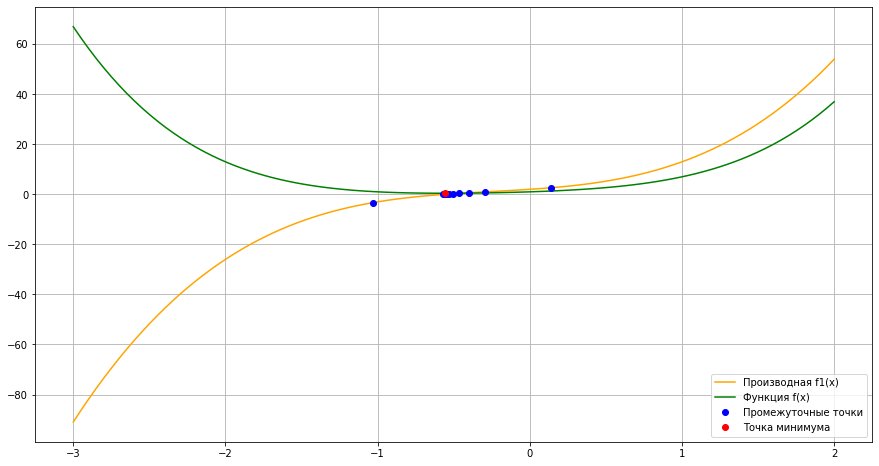

In [13]:
find_min(a, b, e) 